In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('simple_regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


<h3>Create regression model

<h4>Declare the dependent and independent variables

In [4]:
y = data['GPA']
x = data['SAT']

In [5]:
x.shape

(84,)

In [6]:
y.shape

(84,)

<h3>making a regrssion

In [7]:
regression = LinearRegression()

<h4>fit the regression

In [10]:
regression.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[1714 1664 1760 1685 1693 1670 1764 1764 1792 1850 1735 1775 1735 1712
 1773 1872 1755 1674 1842 1786 1761 1722 1663 1687 1974 1826 1787 1821
 2020 1794 1769 1934 1775 1855 1880 1849 1808 1954 1777 1831 1865 1850
 1966 1702 1990 1925 1824 1956 1857 1979 1802 1855 1907 1634 1879 1887
 1730 1953 1781 1891 1964 1808 1893 2041 1893 1832 1850 1934 1861 1931
 1933 1778 1975 1934 2021 2015 1997 2020 1843 1936 1810 1987 1962 2050].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<h4>here we got an error because, for fitting a regression model u need a 2D array. Her our input is 1D array. So we need to convert this 1D array to 2D array.

In [11]:
#changing to 2D matrix
x_matrix = x.values.reshape(-1,1)

#here we made the 1D array to a 2D array of 84 rows and 1 col
x_matrix.shape

(84, 1)

<h4>Now fit the x_matrix

In [12]:
regression.fit(x_matrix,y)

LinearRegression()

<h3>Finding the R-squared

In [13]:
 regression.score(x_matrix,y)

0.40600391479679754

<h3>Finding the coefficient

In [14]:
regression.coef_

array([0.00165569])

<h3>finding the intercept

In [15]:
regression.intercept_

0.2750402996602799

<h3> We see that we get the exact values for R-squared, coefficient and intercept as we got in the previous regression analysis using OLS method.

<h2>Making predictions using sklearn

In [16]:
regression.predict([[1670]])

array([3.04003934])

In [17]:
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [18]:
regression.predict(new_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [19]:
new_data['predicted GPA'] = regression.predict(new_data)
new_data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,predicted GPA
0,1740,3.155938
1,1760,3.189051


# plot the data and fit the line

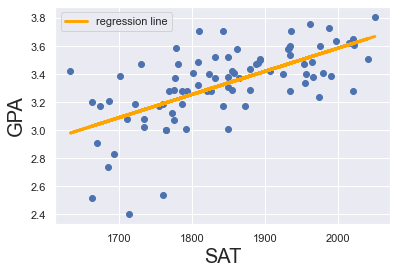

In [22]:
plt.scatter(x,y)
y_ = regression.coef_*x_matrix + regression.intercept_
fig = plt.plot(x,y_, lw = 3, c = 'orange', label = 'regression line')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.legend()